# 非平衡电桥

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sympy as sp
from scipy.stats import linregress

In [37]:
U, I, R1, R2, Rx, Rp = sp.symbols('U I R1 R2 Rx Rp')
sp.solveset(sp.Eq(U, I*(R2*Rx-R1*Rp)/(R1 + R2 + Rx + Rp)), Rx)

Complement({(I*R1*Rp + R1*U + R2*U + Rp*U)/(I*R2 - U)}, {-R1 - R2 - Rp})

In [38]:
def calculate_rx(U, I, R1, R2, Rp):
    return (I*R1*Rp - (R1 + R2 + Rp)*U)/(I*R2 + U)

def to_K(t):
    return t + 273.15

## 热敏电阻

表格数据存储在"a.csv"文件中。

In [ ]:
R1 = 1000
R2 = 1000
Rp = 3.085e4
I = 0.109e-3

上述量需自行更改

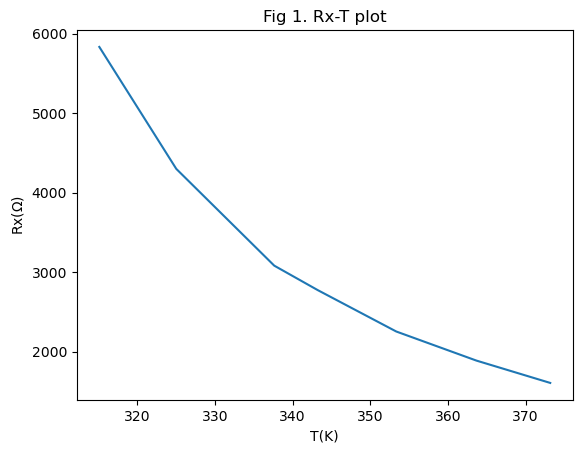

In [ ]:
a = pd.read_csv('a.csv')
Rx = np.abs(calculate_rx(a['U']*10**(-3), I, R1, R2, Rp))
T = to_K(a['t'])
plt.plot(T, Rx)
plt.xlabel('T(K)')
plt.ylabel('Rx($\\Omega$)')
plt.title('Fig 1. Rx-T plot')
plt.show()

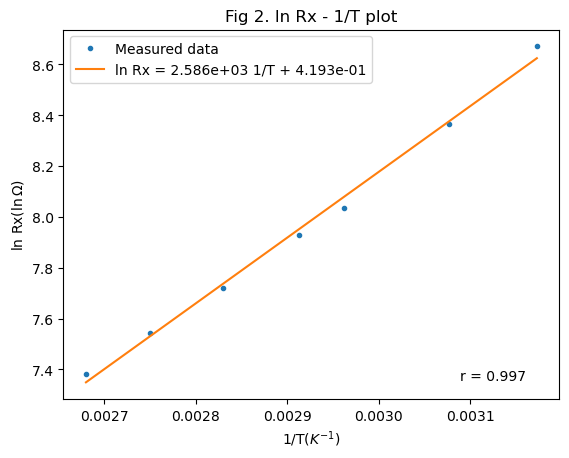

In [40]:
plt.title('Fig 2. ln Rx - 1/T plot')
plt.plot(1/T, np.log(Rx), '.', label='Measured data')
plt.xlabel('1/T($K^{-1}$)')
plt.ylabel('ln Rx($\\ln \\Omega$)')
B, intercept, r, p, se = linregress(1/T, np.log(Rx))
plt.plot(1/T, B*1/T + intercept, label=f'ln Rx = {B:.3e} 1/T + {intercept:.3e}')
plt.text(0.80, 0.05, f"r = {r:.3f}", transform=plt.gca().transAxes)
plt.legend()
plt.show()

# 铂电阻

数据表格存储在"b.csv"中

In [ ]:
R1 = 100
R2 = 100
Rp = 100.6
I = 4.998e-3

上述数据需自行更改。

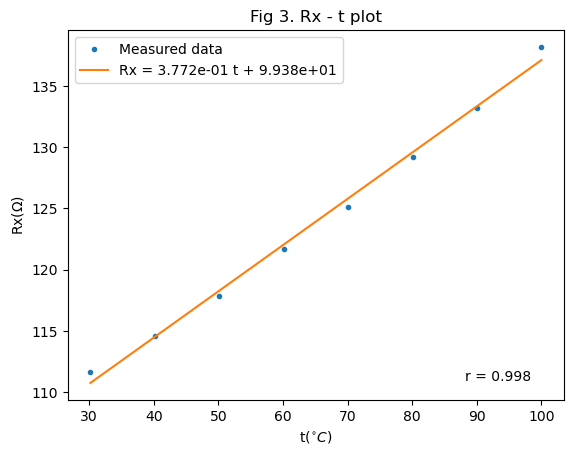

In [ ]:
b = pd.read_csv('b.csv')
t = b['t']
Rx = np.abs(calculate_rx(b['U']*10**(-3), I, R1, R2, Rp))

plt.title('Fig 3. Rx - t plot')
plt.plot(t, Rx, '.', label='Measured data')
slope, intercept, r, p, se = linregress(t, Rx)
plt.plot(t, slope*t + intercept, label=f'Rx = {slope:.3e} t + {intercept:.3e}')
plt.text(0.80, 0.05, f"r = {r:.3f}", transform=plt.gca().transAxes)
plt.legend()
plt.xlabel('t($^{\\circ}C$)')
plt.ylabel('Rx($\\Omega$)')
plt.show()

In [42]:
A = slope/Rp
print(f"A = {A:.3e} ohms^-1")

A = 3.749e-03 ohms^-1
